In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N_c=100     #este numero es la cantidad a leer, debe coincidir con el valor de SIZE en el main
N_s=100     #este numero es la cantidad a leer, debe coincidir con la cantidad de pasos que le diste a evolucionar
states=np.loadtxt("matrix.txt",usecols=0)
Au=np.zeros((N_s,N_c))
for i in range(0,N_c*N_s):
    Au[i/N_s][i%N_c]=states[i]

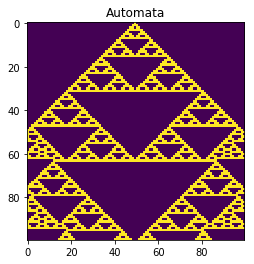

In [9]:
plt.figure()                        #creo el lienzo
plt.title("Automata")
plt.imshow(Au,vmin=0,vmax=1)  #dibujo el estado final

## Simulación magnetización de sistemas con diferentes grados de libertad

Ahora nos proponemos a hallar la dependencia de la magnetización como una función de la temperatura y de la intensidad de campo magnético externo aplicado, así que recuperamos la expresión. Para nuestro análisis. Dado que el estado que tiene un átomo en nuestra rejilla es su valor de espín $\sigma_i$ entonces definimos la magnetización como:  
$$
<M> = \sum_{i} \sigma_i
$$
Por lo tanto ahora nos proponemos a simular la siguiente situación: Dado un sistema bajo una condición inicial de equilibrio le aplicamos un campo magnético el cual irá aumentando su magnitud y veremos como es su función respuesta (magnetización) y para hacer esto usamos el método de Monte Carlo el cual propone hacer un tipo de camino aleatorio a través del espacio de configuración de la rejilla. El algoritmo lo podemos describir como sigue:  
1.) Elegimos un sitio de forma aleatoria (x,y)  
2.) dado los vecinos calculamos la siguiente cantidad:
$$
m_i = \sum_j \sigma_j 
$$
La cual puede tomar los siguientes valores:  
  
$\quad \quad \quad  4  \rightarrow $ 4  vecinos arriba  
$\quad \quad \quad  2  \rightarrow $ 3  vecinos arriba  
$\quad \quad \quad  0  \rightarrow $ 2  vecinos arriba  
$\quad \quad \quad -2  \rightarrow $ 1  vecinos arriba  
$\quad \quad \quad -4  \rightarrow $ 0  vecinos arriba  

3.) Calculamos:  
$$E_+ = -J(m_i) - H$$
$$E_- = +J(m_i) + H$$  

4.) calculamos $\Delta E  = E_{+} - E_{-}$  

5.)  
Ajustamos al espín en la posición (x,y) arriba con probabilidad 
$$
P(\uparrow) = \dfrac{1}{1 + e^{\beta \Delta E}}
$$  
Ajustamos al espín en la posición (x,y) abajo con probabilidad 
$$
P(\downarrow) = \dfrac{1}{1 + e^{-\beta \Delta E}}
$$  
Note que $P(\uparrow) + P(\downarrow) = 1$  
6.) Repita  
  
Note que el cálculo de la energía depende tanto de la Temperatura como de la magnitud del campo magnético aplicado; así que éstas serán nuestras variables para estimular el sistema. Ahora, dependiendo del modelo la rejilla puede tener valores permitidos, así que para cada modelo calcularemos la magnetización en función del campo magnético:  
  
1.) Un paramagneto tipo Ising con S = 1/2  
Para este sistema entonces J=0 y los posibles valores que puede tomar son $\sigma_\pm=\pm 1$  

In [4]:
H=np.loadtxt("Field.txt",usecols=0)   #leo los datos
M1=np.loadtxt("Mag1.txt",usecols=0)
M2=np.loadtxt("Mag2.txt",usecols=0)
M3=np.loadtxt("Mag3.txt",usecols=0)

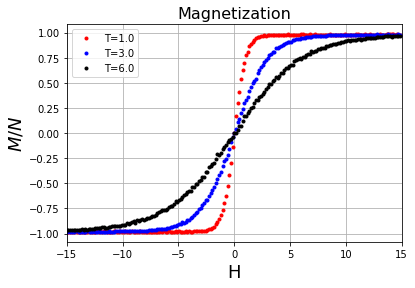

In [5]:
#grafico de los datos

plt.figure()
plt.title("Magnetization",size=16)
plt.ylabel("$M/N$",size=18)
plt.xlabel("H",size=18)
plt.grid()
plt.xlim(-15,15)
plt.plot(H,M1,".r",label="T=1.0")
plt.plot(H,M2,".b",label="T=3.0")
plt.plot(H,M3,".k",label="T=6.0")
plt.legend()